In [10]:
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from pandas.core import datetools

import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Populating the interactive namespace from numpy and matplotlib


# feature 24개

- fecha_dato : The table is partitioned for this column

- ncodpers : Customer code

- ind_empleado : Employee index A : active, B : ex-employed, F : filial, N : not employee, P : pasive #직원 여부

- pais_residencia : Customer's Country residence #거주지

- sexo : Customer's sex #성별

- age : Age #나이

- fecha_alta : The date in which the customer became as the first holder of a contract in the bank #처음 가입 날짜

- ind_nuevo : New customer Index. 1 if the customer registered in the last 6 months. #최근 6개월 가입 여부(신규가입자)

- antiguedad : Customer seniority (in months) #유지 개월 수

- indrel : 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month) #주고객층 여부

- ult_fec_cli_1t : Last date as primary customer (if he isn't at the end of the month) #주고객층이었던 마지막 날짜

- indrel_1mes : Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4(former co-owner) #고객 타입(주고객, 공동소유자, 잠재고객, 이전 주고객, 이전 공동소유자)

- tiprel_1mes : Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) #월초 고객 타입

- indresi : Residence index (S (Yes) or N (No) if the residence country is the same than the bank country) #거주지 인덱스 : 거주 국가와 은행 국가의 일치 여부

- indext : Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country) #외국인 인덱스 : 출생 국가와 은행 국가의 일치 여부

- conyuemp : Spouse index. 1 if the customer is spouse of an employee #배우자 인덱스 : 직원의 배우자인 경우

- canal_entrada : channel used by the customer to join #가입한 채널

- indfall : Deceased index. N/S #사망 여부

- tipodom : Addres type. 1, primary address #주소 타입 : 1일 경우 주요 주소

- cod_prov : Province code (customer's address) #거주지 지역 코드

- nomprov : Province name #지역 이름

- ind_actividad_cliente : Activity index (1, active customer; 0, inactive customer) #활동 인덱스 : 1, 0

- renta : Gross income of the household #총 수입

- segmento : segmentation: 01 - VIP, 02 - Individuals 03 - college graduated #구분 : VIP / 개인 / 대학졸업자

# Class 24개

- ind_ahor_fin_ult1 : Saving Account #저축통장
- ind_aval_fin_ult1 : Guarantees #보증
- ind_cco_fin_ult1 : Current Accounts #예금
- ind_cder_fin_ult1 : Derivada Account #파생계좌
- ind_cno_fin_ult1	Payroll Account #월급통장
- ind_ctju_fin_ult1 : Junior Account #어린이계좌
- ind_ctma_fin_ult1	: Más particular Account #특별계좌1
- ind_ctop_fin_ult1 : particular Account #특별계좌2
- ind_ctpp_fin_ult1 : particular Plus Account #특별계좌3
- ind_deco_fin_ult1 : Short-term deposits #단기예금
- ind_deme_fin_ult1 : Medium-term deposits #중기예금
- ind_dela_fin_ult1 : Long-term deposits #장기예금
- ind_ecue_fin_ult1	: e-account #온라인계좌
- ind_fond_fin_ult1	: Funds #펀드
- ind_hip_fin_ult1 : Mortgage #담보대출
- ind_plan_fin_ult1 : Pensions #연금 
- ind_pres_fin_ult1 : Loans #대출
- ind_reca_fin_ult1 : Taxes #세금 
- ind_tjcr_fin_ult1 : Credit Card #신용카드
- ind_valo_fin_ult1 : Securities #증권
- ind_viv_fin_ult1 : Home Account #내집마련계좌
- ind_nomina_ult1 : Payroll #월급
- ind_nom_pens_ult1 : Pensions #연금
- ind_recibo_ult1 : Direct Debit #자동이체

In [42]:
1.3e5

130000.0

In [11]:
# limit_rows = 1000000
train = pd.read_csv("train.csv", dtype={"sexo":str, "ind_nuevo":str, 
                                  "ult_fec_cli_1t":str, 
                                  "indext":str})
#, nrows=limit_rows

In [12]:
train.ncodpers = train.ncodpers.astype(int)

In [4]:
# #Returns a random sample of items from an axis of object.
# unique_ids = pd.Series(train["ncodpers"].unique()) #ncodpers : 고객넘버
# unique_id = unique_ids.sample(n=1.3e5)
# train = train[train.ncodpers.isin(unique_id)]

TypeError: 'float' object cannot be interpreted as an integer

In [13]:
train["ncodpers"].count()

13647309

In [14]:
#pandas.to_numeric(arg, errors='raise', downcast=None)
#If ‘coerce’, then invalid parsing will be set as NaN
train["age"] = pd.to_numeric(train["age"], errors="coerce")
train["antiguedad"] = pd.to_numeric(train["antiguedad"], errors="coerce") 
train["indrel_1mes"] = pd.to_numeric(train["indrel_1mes"], errors="coerce") 

In [7]:
train["age"].dtypes

dtype('float64')

### Missing Data

In [15]:
train.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                         27734
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                  27734
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                150655
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [16]:
train = train.drop(["ult_fec_cli_1t", "conyuemp"], axis=1)

In [17]:
train["renta"] = train["renta"].transform(lambda x: x.fillna(x.mean()))

In [18]:
train[train["antiguedad"] < 0] = 0

In [19]:
#total num of products
train["tot_products"] = train.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
train["tot_products"] = pd.to_numeric(train["tot_products"], errors="coerce") 

In [20]:
train['pais_residencia'].describe()

count     13619575
unique         119
top             ES
freq      13553672
Name: pais_residencia, dtype: object

In [21]:
train['ind_empleado'].value_counts()

N    13610939
B        3566
F        2523
A        2492
0          38
S          17
Name: ind_empleado, dtype: int64

In [22]:
#for visualization, remove minority
train = train.loc[lambda train: train.pais_residencia == "ES", :]
train = train.loc[lambda train: train.ind_empleado == "N", :]

In [23]:
train = train.dropna(axis=0)

In [24]:
train.count(0)

fecha_dato               13382540
ncodpers                 13382540
ind_empleado             13382540
pais_residencia          13382540
sexo                     13382540
age                      13382540
fecha_alta               13382540
ind_nuevo                13382540
antiguedad               13382540
indrel                   13382540
indrel_1mes              13382540
tiprel_1mes              13382540
indresi                  13382540
indext                   13382540
canal_entrada            13382540
indfall                  13382540
tipodom                  13382540
cod_prov                 13382540
nomprov                  13382540
ind_actividad_cliente    13382540
renta                    13382540
segmento                 13382540
ind_ahor_fin_ult1        13382540
ind_aval_fin_ult1        13382540
ind_cco_fin_ult1         13382540
ind_cder_fin_ult1        13382540
ind_cno_fin_ult1         13382540
ind_ctju_fin_ult1        13382540
ind_ctma_fin_ult1        13382540
ind_ctop_fin_u

In [191]:
train_x = train[['ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
        'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']]

- 클래스 개수

In [25]:
train_y = train[['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']]

train_count = train_y.sum()
train_count = train_count.drop(train_count[train_count == 0].index).sort_values(ascending=False)[:30]
count_data = pd.DataFrame({'count' :train_count})
count_data.head(24)

,count
ind_cco_fin_ult1,8805927.0
ind_ctop_fin_ult1,1741600.0
ind_recibo_ult1,1734398.0
ind_ecue_fin_ult1,1120640.0
ind_cno_fin_ult1,1098590.0
ind_nom_pens_ult1,806481.0
ind_nomina_ult1,742611.0
ind_reca_fin_ult1,702912.0
ind_tjcr_fin_ult1,599892.0
ind_ctpp_fin_ult1,586686.0


### 1. 기본 정보

- 나이

Text(0,0.5,'Number of customers')

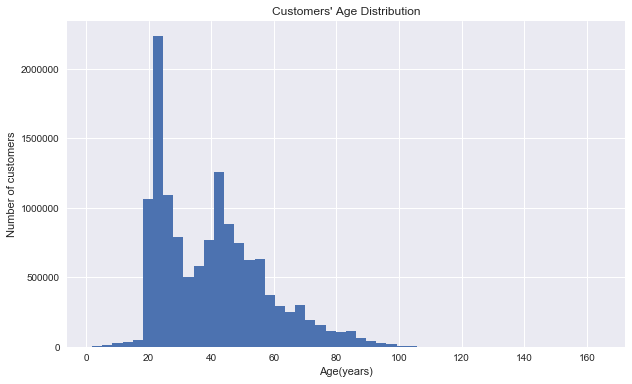

In [26]:
train['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

Text(0,0.5,'Number of products')

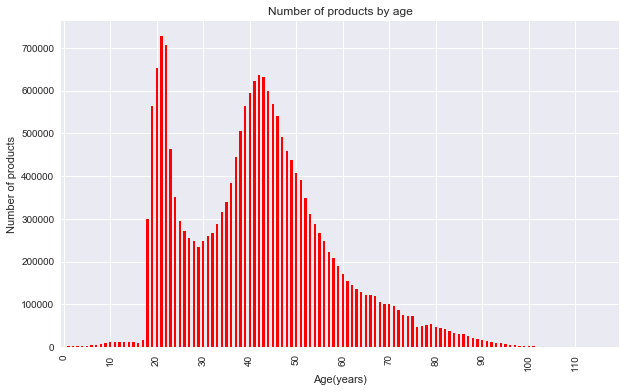

In [27]:
df_a = train.groupby(['age'])['tot_products'].agg('sum')

df_a.plot(kind='bar', colormap='autumn', legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products')

- 20대 초반이 절대적 수치로는 많은 상품에 가입하고 있는 것으로 보이나, age distribution과 비교해보면 30대가 일반적으로 많은 상품에 가입한다고 판단

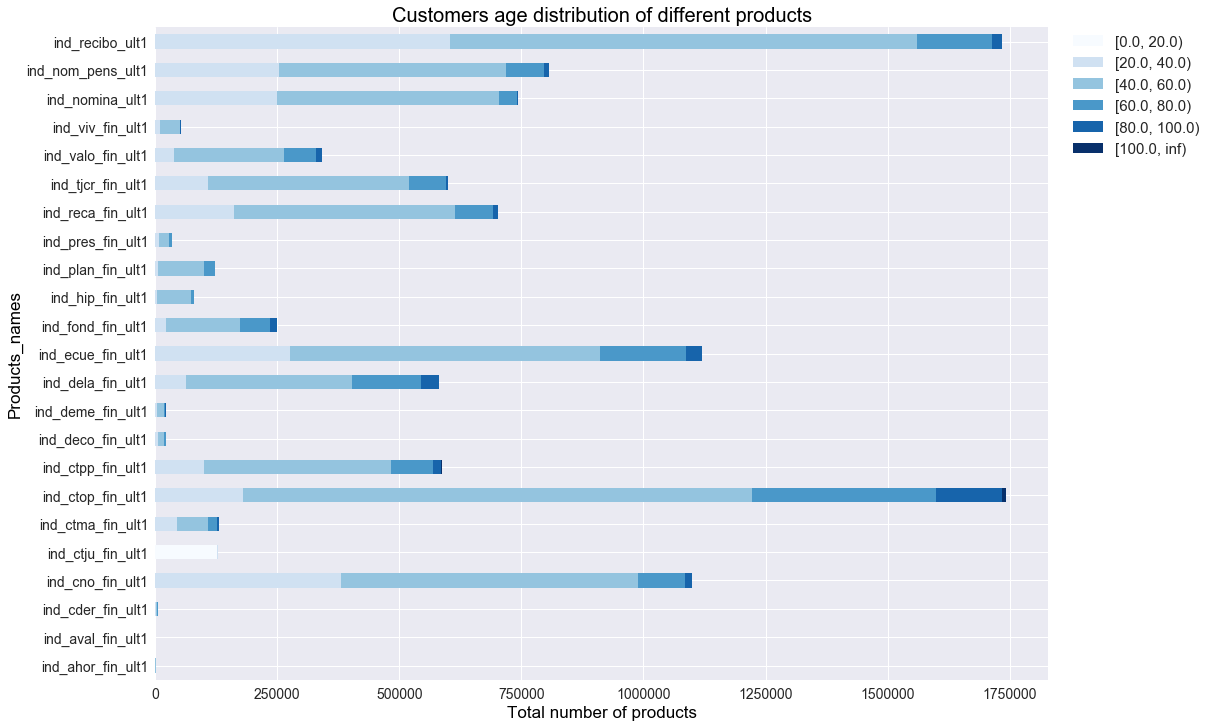

In [28]:
df_a = (train.groupby(pd.cut(train['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Blues')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})

- ind_ctop_fin_ult1 등 눈에 띄게 다른 포션의 상품이 존재

- 성별, 외국인, 사망여부

Text(0.5,1,'death')

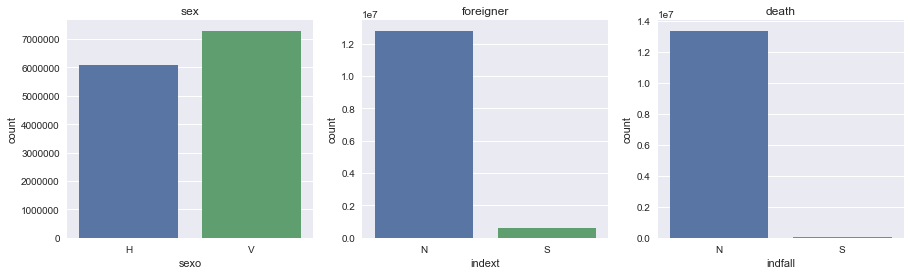

In [29]:
f, ax = plt.subplots(1, 3, figsize = (15, 4))
sns.countplot(x='sexo', data=train, ax=ax[0])
ax[0].set_title('sex')
sns.countplot(x='indext', data=train, ax=ax[1])
ax[1].set_title('foreigner')
sns.countplot(x='indfall', data=train, ax=ax[2])
ax[2].set_title('death')

- 외국인과 사망자 인덱스는 낮은 비중

In [30]:
df_s = train.loc[:, ['sexo']].join(train.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_s = df_s.groupby(['sexo']).sum()
df_s = df_s.T
df_s

sexo,H,V
ind_ahor_fin_ult1,342.0,1037.0
ind_aval_fin_ult1,64.0,218.0
ind_cco_fin_ult1,4123073.0,4682854.0
ind_cder_fin_ult1,726.0,4547.0
ind_cno_fin_ult1,449381.0,649209.0
ind_ctju_fin_ult1,62319.0,66234.0
ind_ctma_fin_ult1,52244.0,77497.0
ind_ctop_fin_ult1,651493.0,1090107.0
ind_ctpp_fin_ult1,226449.0,360237.0
ind_deco_fin_ult1,9885.0,13121.0


Text(0.5,1,'Popularity of products by sex')

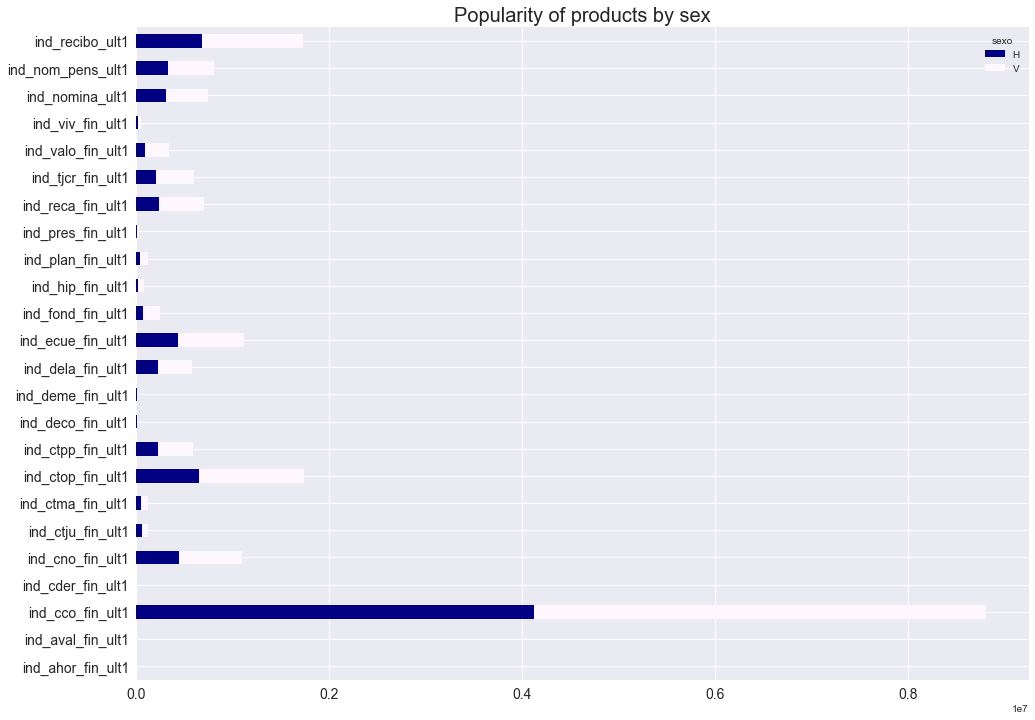

In [31]:
df_s.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex', fontsize=20)
#성별별로 다른 양상 보이는 상품은?

- 여성이 남성보다 숫자가 적으므로 더 적은 숫자의 상품 가입 양상, 하지만 비율이 다른 상품이 존재(여성이 훨씬 더 적게 가입)

In [32]:
train["tot_products"].value_counts()

1.0     7038785
0.0     2456484
2.0     1911340
3.0      764655
4.0      446597
5.0      287905
6.0      209744
7.0      140659
8.0       75410
9.0       33207
10.0      12239
11.0       4164
12.0       1094
13.0        222
14.0         26
15.0          9
Name: tot_products, dtype: int64

- 수입

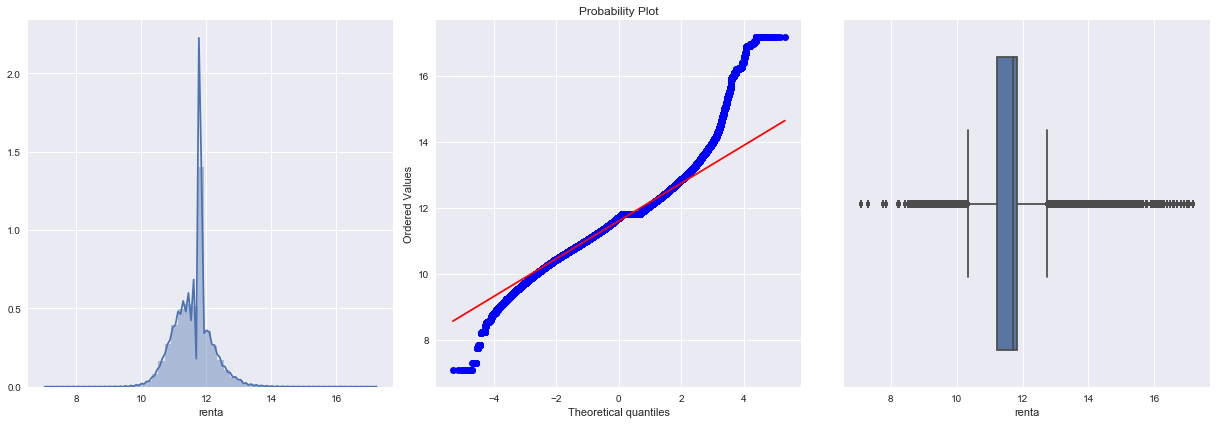

count    1.338254e+07
mean     1.161197e+01
std      5.792006e-01
min      7.092349e+00
25%      1.123726e+01
50%      1.171969e+01
75%      1.183861e+01
max      1.717916e+01
Name: renta, dtype: float64 

Skewness: 0.246571
Kurtosis: 2.093769


In [33]:
renta = np.log(train['renta'])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(renta)

plt.subplot(132)
stats.probplot(renta, plot=plt)

plt.subplot(133)
sns.boxplot(renta)
plt.tight_layout()
plt.show()

print(renta.describe(),"\n")

print("Skewness: %f" % renta.skew())
print("Kurtosis: %f" % renta.kurt())

- renta nan값 280만개 정도
- 1.161197e+01에 몰려있는 모양새

In [34]:
df_i = (train.groupby(pd.cut(train['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())

In [35]:
df_i["tot_products"]

renta
[0.0, 60000.0)          2451851.0
[60000.0, 120000.0)     6666693.0
[120000.0, 180000.0)    6983401.0
[180000.0, 240000.0)    1800280.0
[240000.0, inf)         1809045.0
Name: tot_products, dtype: float64

In [36]:
df_i = df_i.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_i = df_i.T
df_i

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,105.0,250.0,520.0,255.0,249.0
ind_aval_fin_ult1,6.0,60.0,71.0,106.0,39.0
ind_cco_fin_ult1,1347731.0,3082980.0,3147125.0,610756.0,617335.0
ind_cder_fin_ult1,619.0,1458.0,1963.0,623.0,610.0
ind_cno_fin_ult1,128518.0,376670.0,378663.0,110181.0,104558.0
ind_ctju_fin_ult1,9584.0,39422.0,49046.0,16458.0,14043.0
ind_ctma_fin_ult1,13573.0,41215.0,53269.0,11606.0,10078.0
ind_ctop_fin_ult1,164517.0,554547.0,628175.0,193648.0,200713.0
ind_ctpp_fin_ult1,50206.0,191072.0,209789.0,66766.0,68853.0
ind_deco_fin_ult1,2620.0,7823.0,9430.0,1702.0,1431.0


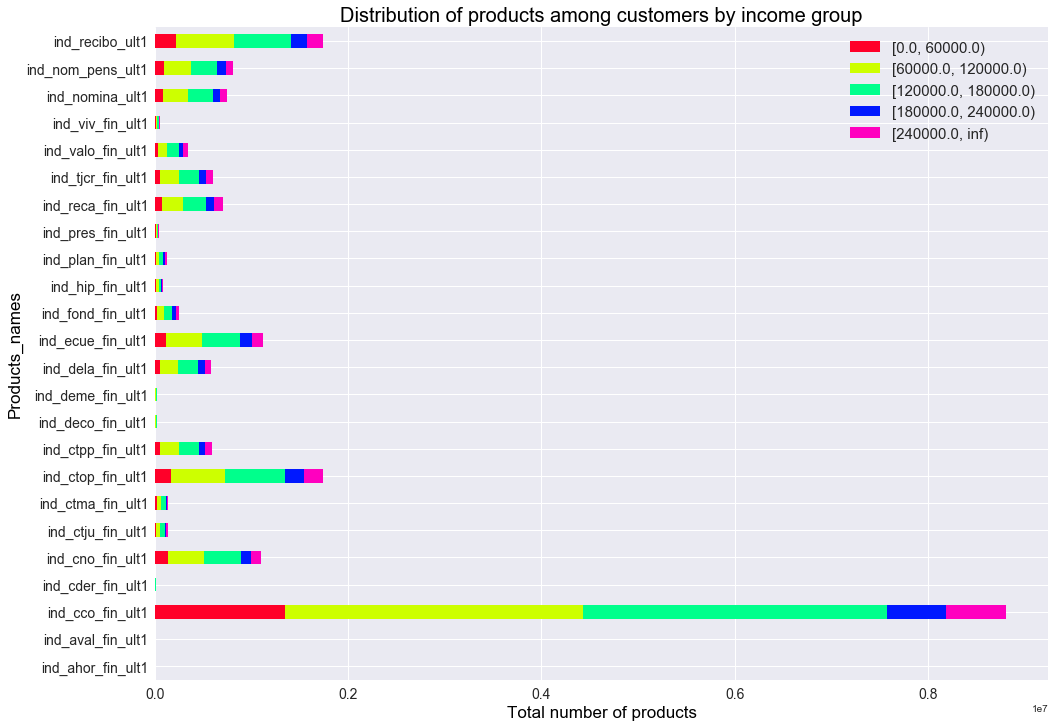

In [37]:
df_i.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

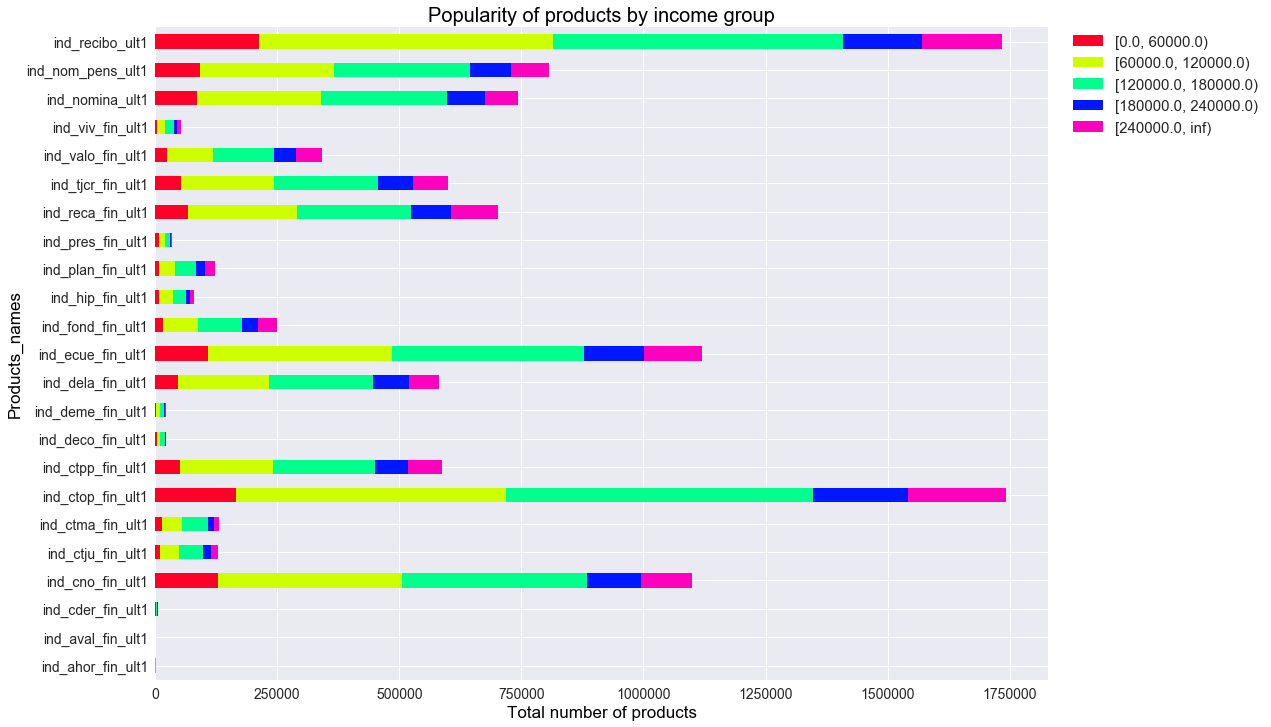

In [38]:
exclude = ['ind_cco_fin_ult1']
df_i = df_i.T
df_i = df_i.drop(exclude, axis=1).T

df_i.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of products by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

- 수치적으로는 수입대별로 다른 포션의 상품들이 존재하지만, 순위는 크게 달라지지 않는듯 보임

- 거주지

Text(0.5,1,'primary adress')

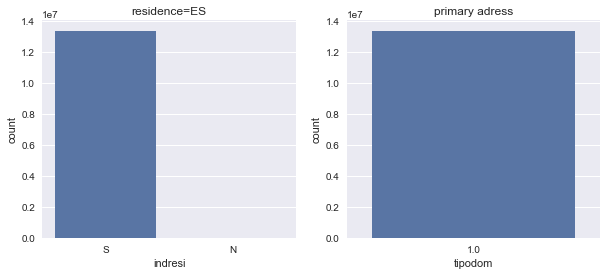

In [39]:
f, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.countplot(x='indresi', data=train, ax=ax[0])
ax[0].set_title('residence=ES')
sns.countplot(x='tipodom', data=train, ax=ax[1])
ax[1].set_title('primary adress')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

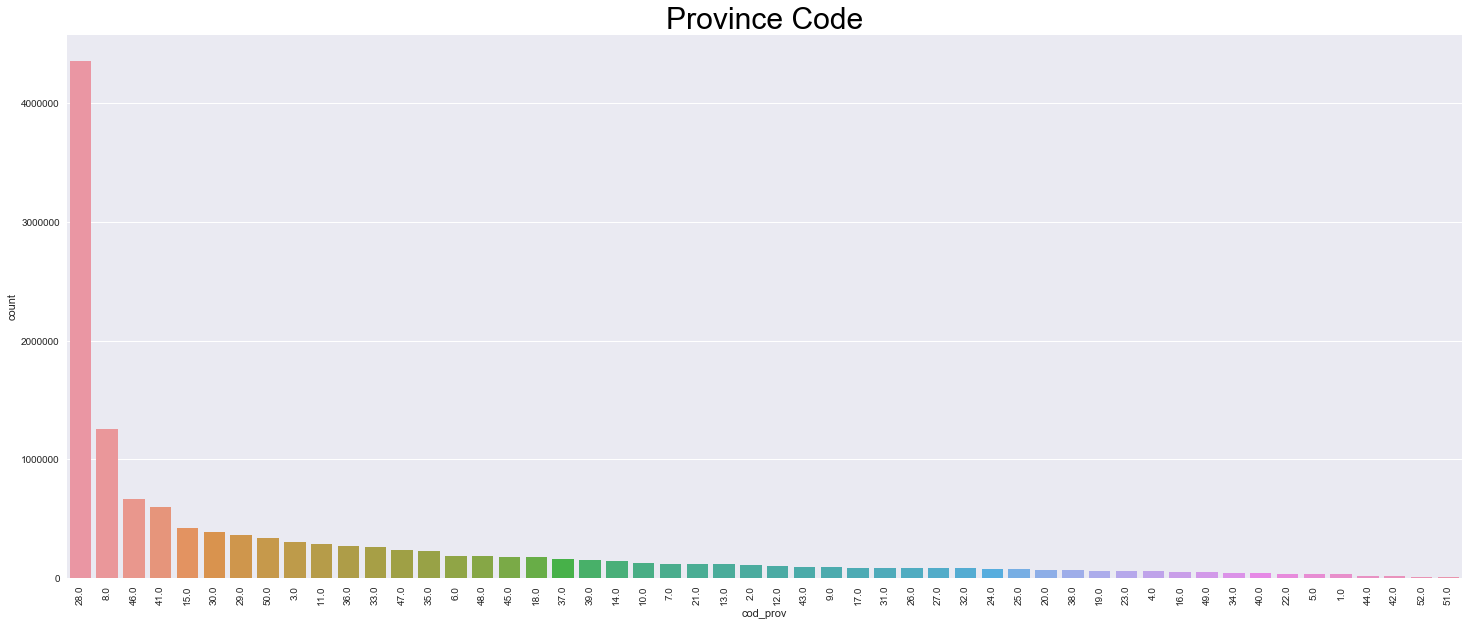

In [40]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='cod_prov', data=train, order=train['cod_prov'].value_counts().index)
plt.title('Province Code', fontsize=30, color='black')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

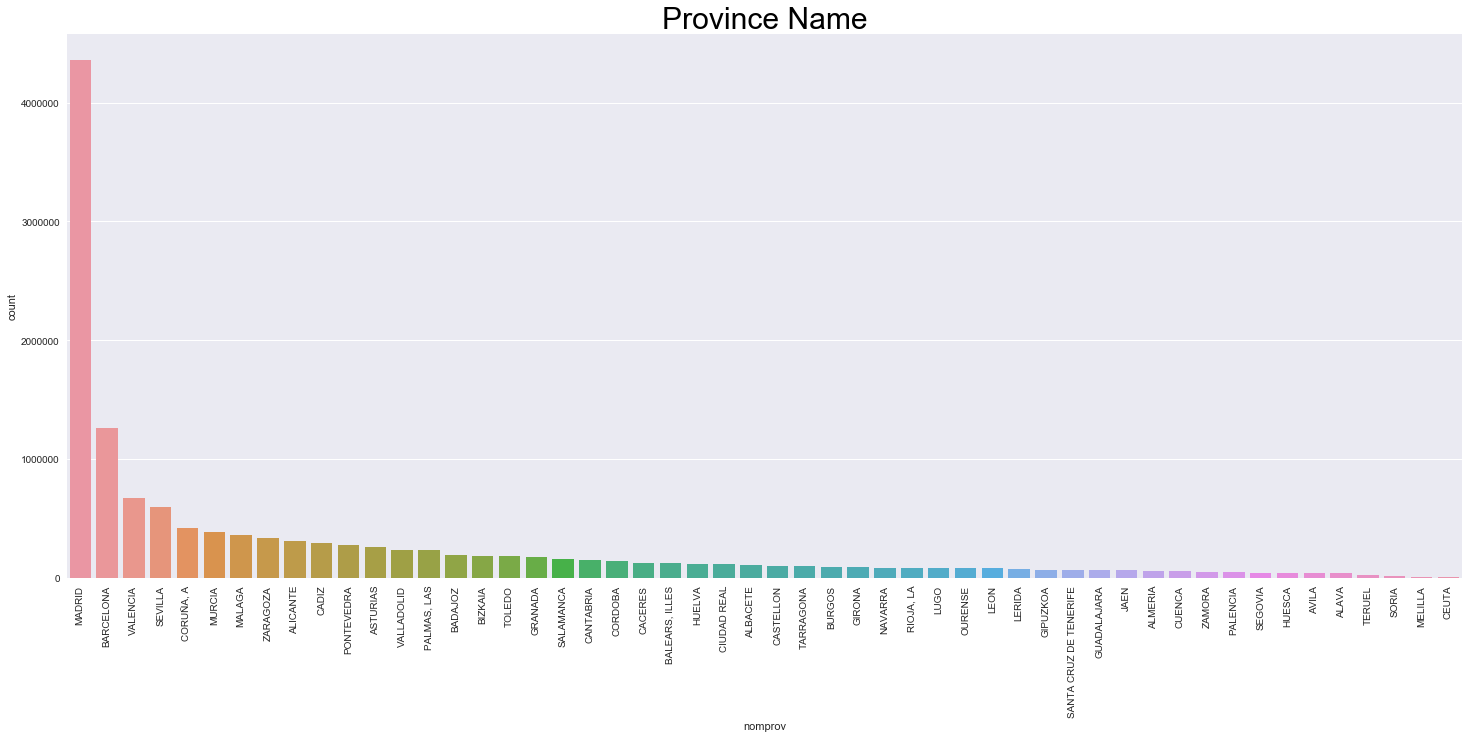

In [41]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='nomprov', data=train, order=train['nomprov'].value_counts().index)
plt.title('Province Name', fontsize=30, color='black')
plt.xticks(rotation=90)

- madrid에 압도적인 숫자의 사람들 거주
- 그외에 고만고만하며 클래스가 매우 많다, 이런경우 나눠볼 필요가 있나?

### 2. 고객 타입

- 직원

Text(0.5,1,'Employee Index')

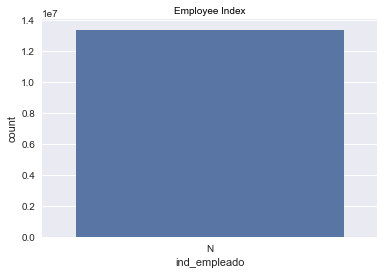

In [42]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='ind_empleado', data=train, order=train['ind_empleado'].value_counts().index)
plt.title('Employee Index', fontsize=10, color='black')

- Primary Customer

Text(0.5,1,'Customer Type(biginning of the month)')

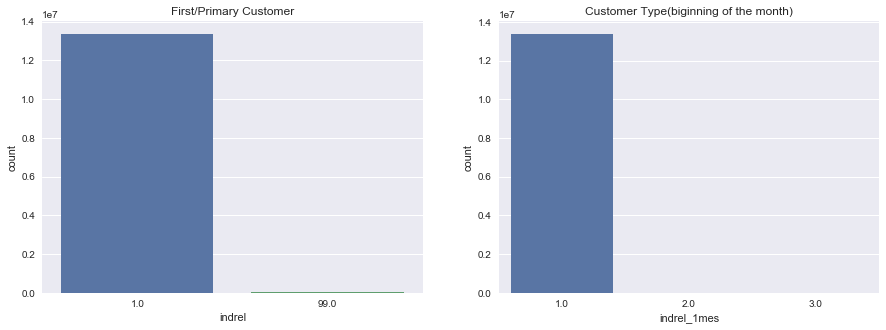

In [43]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(x='indrel', data=train, ax=ax[0])
ax[0].set_title('First/Primary Customer')
sns.countplot(x='indrel_1mes', data=train, ax=ax[1])
ax[1].set_title('Customer Type(biginning of the month)')

#indrel_1mes : Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4(former co-owner)

- Activity

Text(0.5,1,'Activity index ')

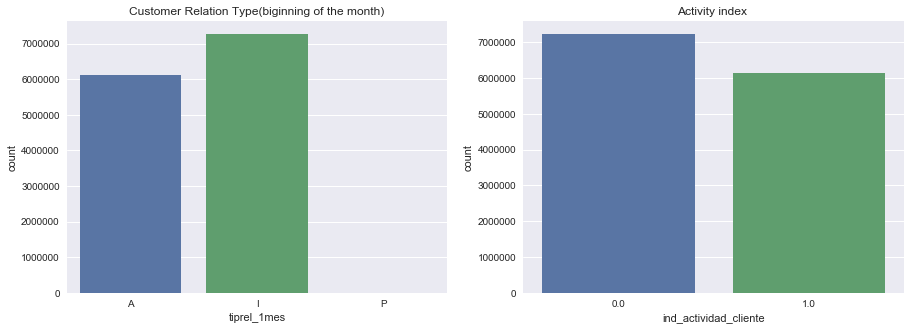

In [44]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(x='tiprel_1mes', data=train, ax=ax[0])
ax[0].set_title('Customer Relation Type(biginning of the month)')
sns.countplot(x='ind_actividad_cliente', data=train, ax=ax[1])
ax[1].set_title('Activity index ')
#tiprel_1mes : Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

Text(0.5,1,'Popularity of products by activity')

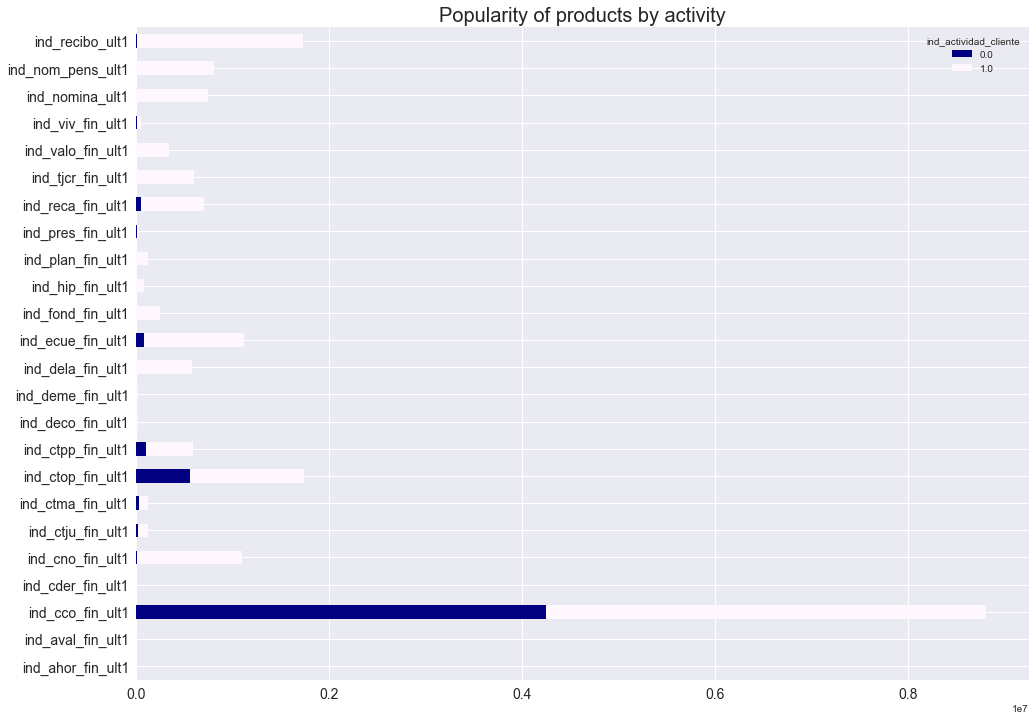

In [45]:
df_ac = train.loc[:, ['ind_actividad_cliente']].join(train.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_ac = df_ac.groupby(['ind_actividad_cliente']).sum()
df_ac = df_ac.T

df_ac.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by activity', fontsize=20)

- activate : 0인 고객은 특정 상품에만 가입하는 것으로 판단

Text(0.5,1,'Customer Segmentaion')

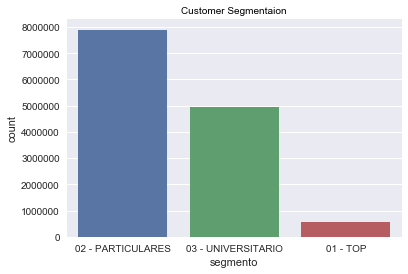

In [46]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='segmento', data=train, order=train['segmento'].value_counts().index)
plt.title('Customer Segmentaion', fontsize=10, color='black')

Text(0.5,1,'Popularity of products by segmentation')

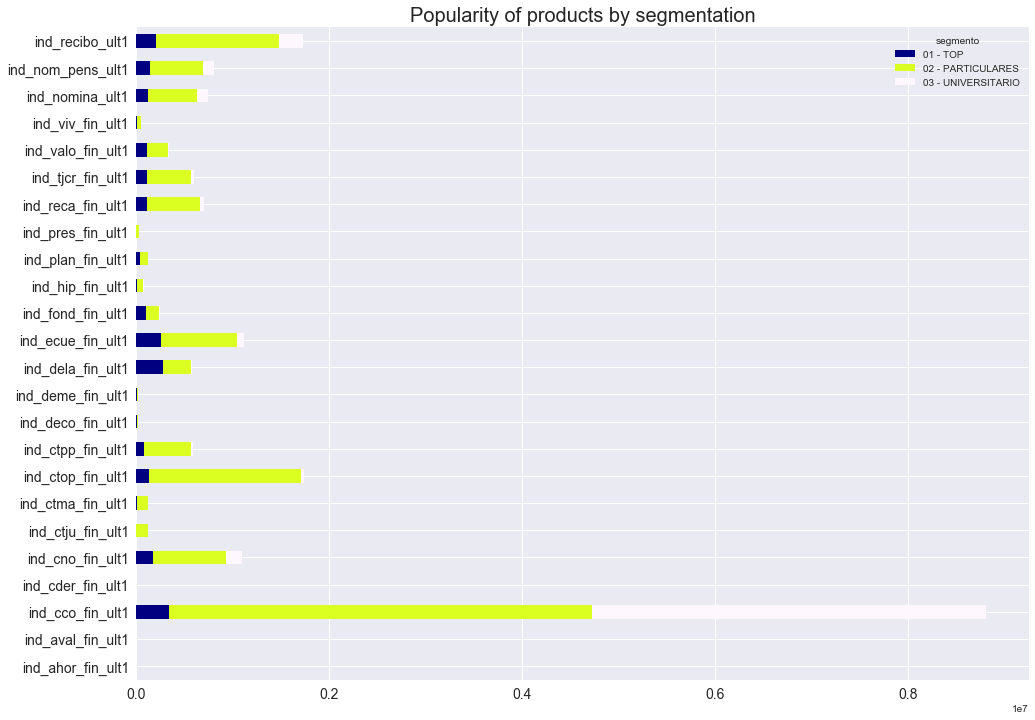

In [47]:
df_se = train.loc[:, ['segmento']].join(train.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_se = df_se.groupby(['segmento']).sum()
df_se = df_se.T

df_se.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by segmentation', fontsize=20)

- universitario 특히 민감

In [48]:
# age & activity?

df_ac = train.loc[:, ['age']].join(train.loc[:, 'ind_actividad_cliente': 'ind_actividad_cliente'])
df_ac = df_ac.groupby(['age']).sum()
df_ac = df_ac.T

df_ac

age,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,126.0,127.0,163.0,164.0
ind_actividad_cliente,530.0,1318.0,1860.0,2517.0,3145.0,3247.0,3879.0,4700.0,6238.0,7781.0,9329.0,9575.0,9167.0,9512.0,8370.0,8331.0,7453.0,12514.0,142991.0,215623.0,211015.0,217652.0,201186.0,114748.0,84218.0,73898.0,76476.0,79332.0,80900.0,78904.0,86448.0,92028.0,94857.0,101379.0,109796.0,116349.0,127812.0,146957.0,163225.0,176753.0,182816.0,188268.0,188446.0,184463.0,174004.0,165381.0,156285.0,142883.0,134459.0,127861.0,119518.0,115065.0,102818.0,92392.0,84136.0,79683.0,73514.0,66297.0,62242.0,56788.0,51909.0,46459.0,43197.0,41144.0,39375.0,36782.0,36735.0,36903.0,31484.0,30961.0,30729.0,29755.0,26860.0,23356.0,23347.0,22480.0,15291.0,15194.0,16117.0,17099.0,15168.0,14205.0,13678.0,12169.0,10915.0,10028.0,9021.0,8112.0,7074.0,5511.0,4915.0,4197.0,3882.0,2907.0,2522.0,1723.0,1193.0,990.0,606.0,674.0,585.0,352.0,225.0,224.0,153.0,167.0,75.0,80.0,89.0,54.0,64.0,59.0,7.0,37.0,28.0,3.0,0.0,0.0,0.0,0.0


### 3. 가입 정보

- 유지 개월 수

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

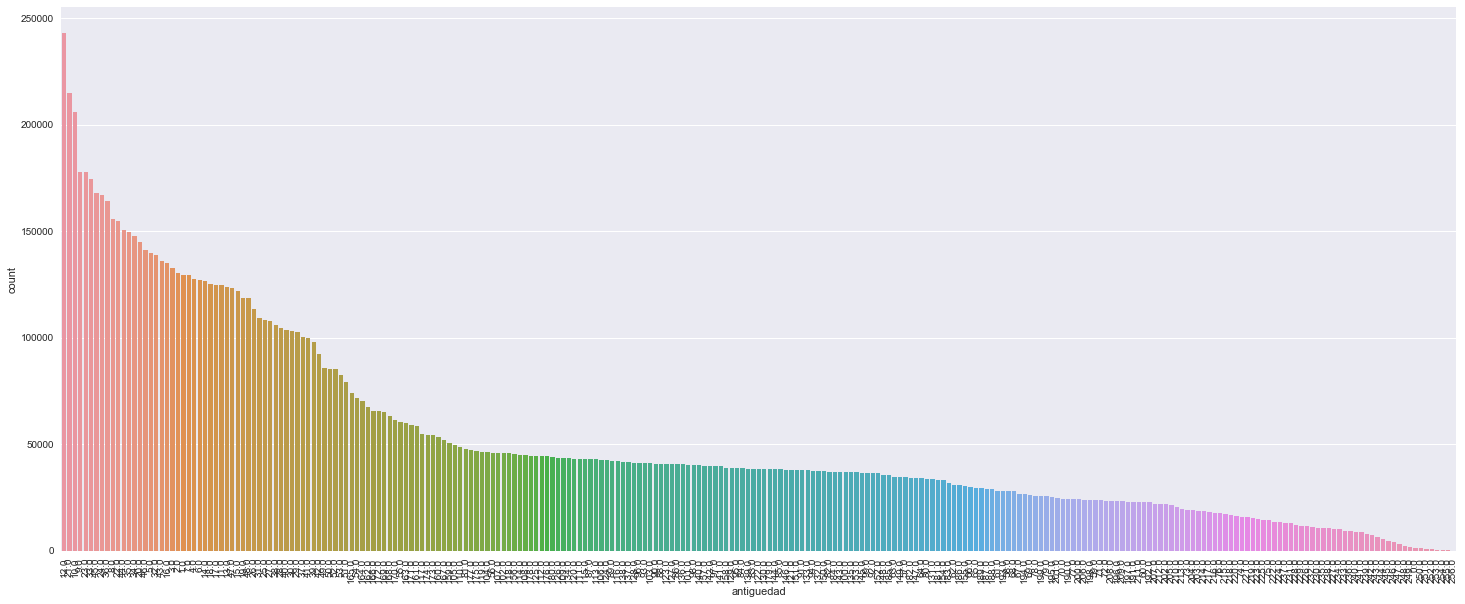

In [49]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x='antiguedad', data=train, order=train['antiguedad'].value_counts().index)
plt.xticks(rotation=90)

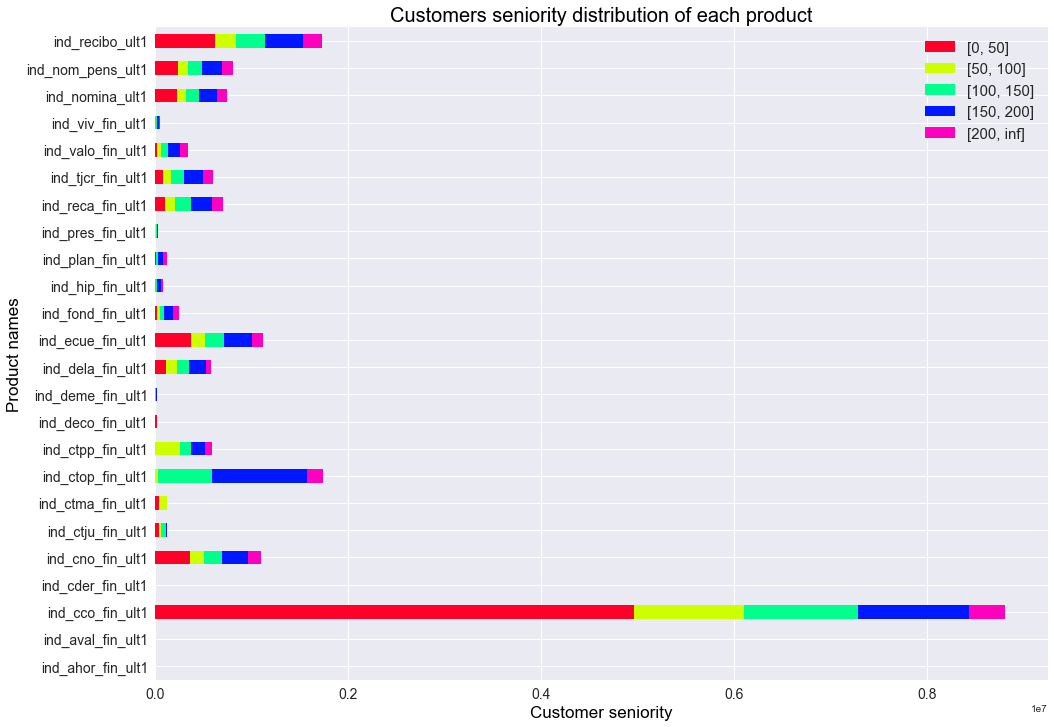

In [50]:
df_a = train.loc[:, ['antiguedad']].join(train.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_a = (df_a.groupby(pd.cut(df_a['antiguedad'], [0,50,100,150,200, pd.np.inf], right=False))
                     .sum())
exclude = ["antiguedad"]
df_a = df_a.drop(exclude, axis=1).T

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 

- ind_ctpp_fin_ult1
- ind_ctop_fin_ult1 등은 초기 고객 아예 가입하지 않음

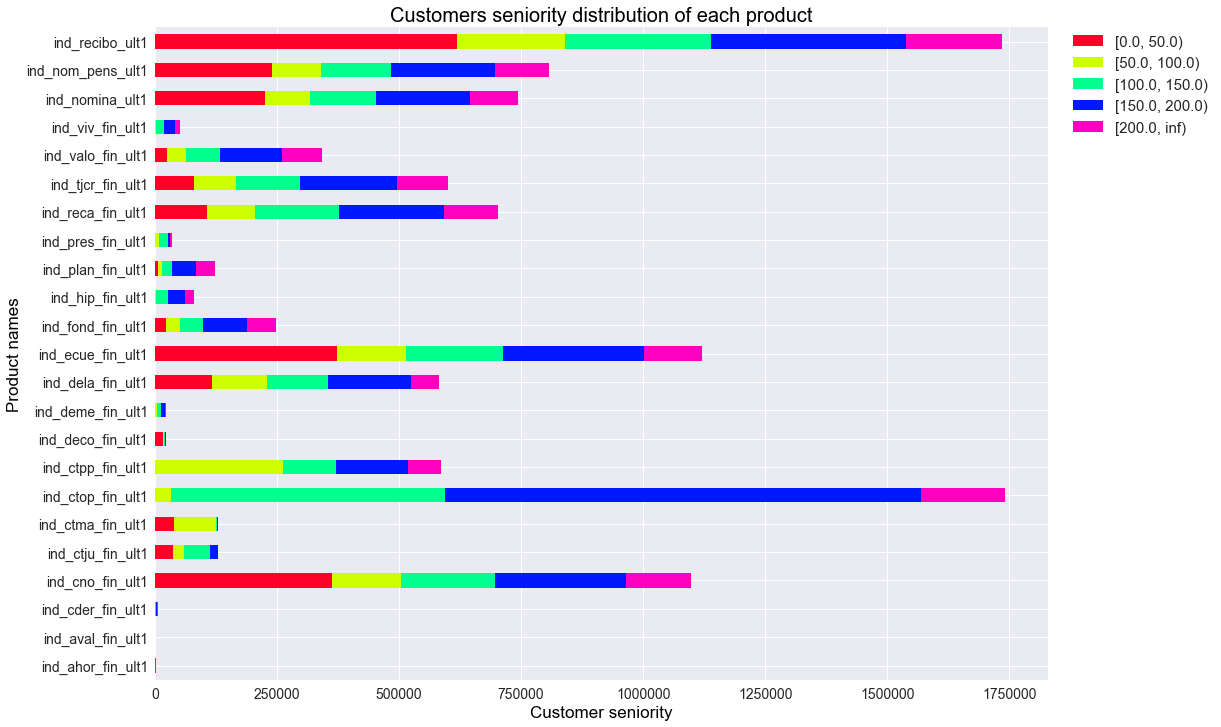

In [51]:
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})

- ind_viv_fin_ult1
- ind_pres_fin_ult1
- ind_hip_fin_ult1
- ind_ctpp_fin_ult1
- ind_ctop_fin_ult1

- ind_plan_fin_ult1, ind_pres_fin_ult1, ind_hip_fin_ult1 : 0~100은 작은 비중

In [52]:
df_a = train["tot_products"].value_counts()
df_a = pd.DataFrame(df_a)

count = train["ncodpers"].count()
df_a["percentage"] = (df_a["tot_products"]/count)*100
df_a

,tot_products,percentage
1.0,7038785,52.596779
0.0,2456484,18.355888
2.0,1911340,14.282341
3.0,764655,5.713826
4.0,446597,3.337162
5.0,287905,2.151348
6.0,209744,1.567296
7.0,140659,1.051064
8.0,75410,0.563495
9.0,33207,0.248137


- 56.26퍼센트의 사람들이 1개만 가입, 그 다음이 0개, 그 다음이 2개

- 가입 채널

In [53]:
train['canal_entrada'].value_counts().head(15)

KHE    4050963
KAT    3233063
KFC    3088209
KHQ     591034
KFA     399011
KHK     240951
KHM     183641
KHN     116410
KHD     116000
KAS      85031
RED      74690
KAG      73479
KAY      66891
KAA      65170
KAB      61991
Name: canal_entrada, dtype: int64

In [68]:
ls = train['canal_entrada'].values
ls = ls.tolist()
ls = set(ls)
ls

{'004',
 '007',
 '013',
 '025',
 'K00',
 'KAA',
 'KAB',
 'KAC',
 'KAD',
 'KAE',
 'KAF',
 'KAG',
 'KAH',
 'KAI',
 'KAJ',
 'KAK',
 'KAL',
 'KAM',
 'KAN',
 'KAO',
 'KAP',
 'KAQ',
 'KAR',
 'KAS',
 'KAT',
 'KAU',
 'KAV',
 'KAW',
 'KAY',
 'KAZ',
 'KBB',
 'KBD',
 'KBE',
 'KBF',
 'KBG',
 'KBH',
 'KBJ',
 'KBL',
 'KBM',
 'KBN',
 'KBO',
 'KBP',
 'KBQ',
 'KBR',
 'KBS',
 'KBU',
 'KBV',
 'KBW',
 'KBX',
 'KBY',
 'KBZ',
 'KCA',
 'KCB',
 'KCC',
 'KCD',
 'KCE',
 'KCF',
 'KCG',
 'KCH',
 'KCI',
 'KCJ',
 'KCK',
 'KCL',
 'KCM',
 'KCN',
 'KCO',
 'KCP',
 'KCQ',
 'KCR',
 'KCS',
 'KCT',
 'KCU',
 'KCV',
 'KCX',
 'KDA',
 'KDB',
 'KDC',
 'KDD',
 'KDE',
 'KDF',
 'KDG',
 'KDH',
 'KDI',
 'KDL',
 'KDM',
 'KDN',
 'KDO',
 'KDP',
 'KDQ',
 'KDR',
 'KDS',
 'KDT',
 'KDU',
 'KDV',
 'KDW',
 'KDX',
 'KDY',
 'KDZ',
 'KEA',
 'KEB',
 'KEC',
 'KED',
 'KEE',
 'KEF',
 'KEG',
 'KEH',
 'KEI',
 'KEJ',
 'KEK',
 'KEL',
 'KEM',
 'KEN',
 'KEO',
 'KEQ',
 'KES',
 'KEU',
 'KEV',
 'KEW',
 'KEY',
 'KEZ',
 'KFA',
 'KFB',
 'KFC',
 'KFD',
 'KFE',


In [ ]:
ls = ['KHQ', 'KFA', 'KHK', 'KHM', 'K']

for n in 

train[train["canl_entrada"] == n] = 0

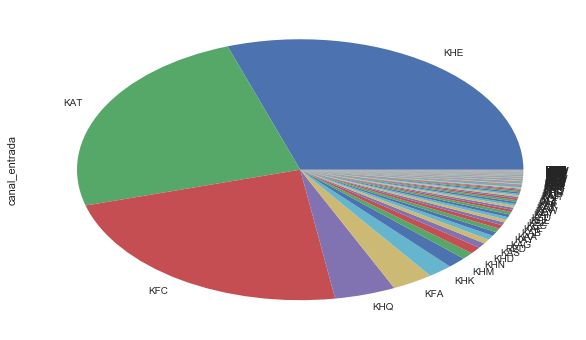

In [54]:
train["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

Text(0,0.5,'Product names')

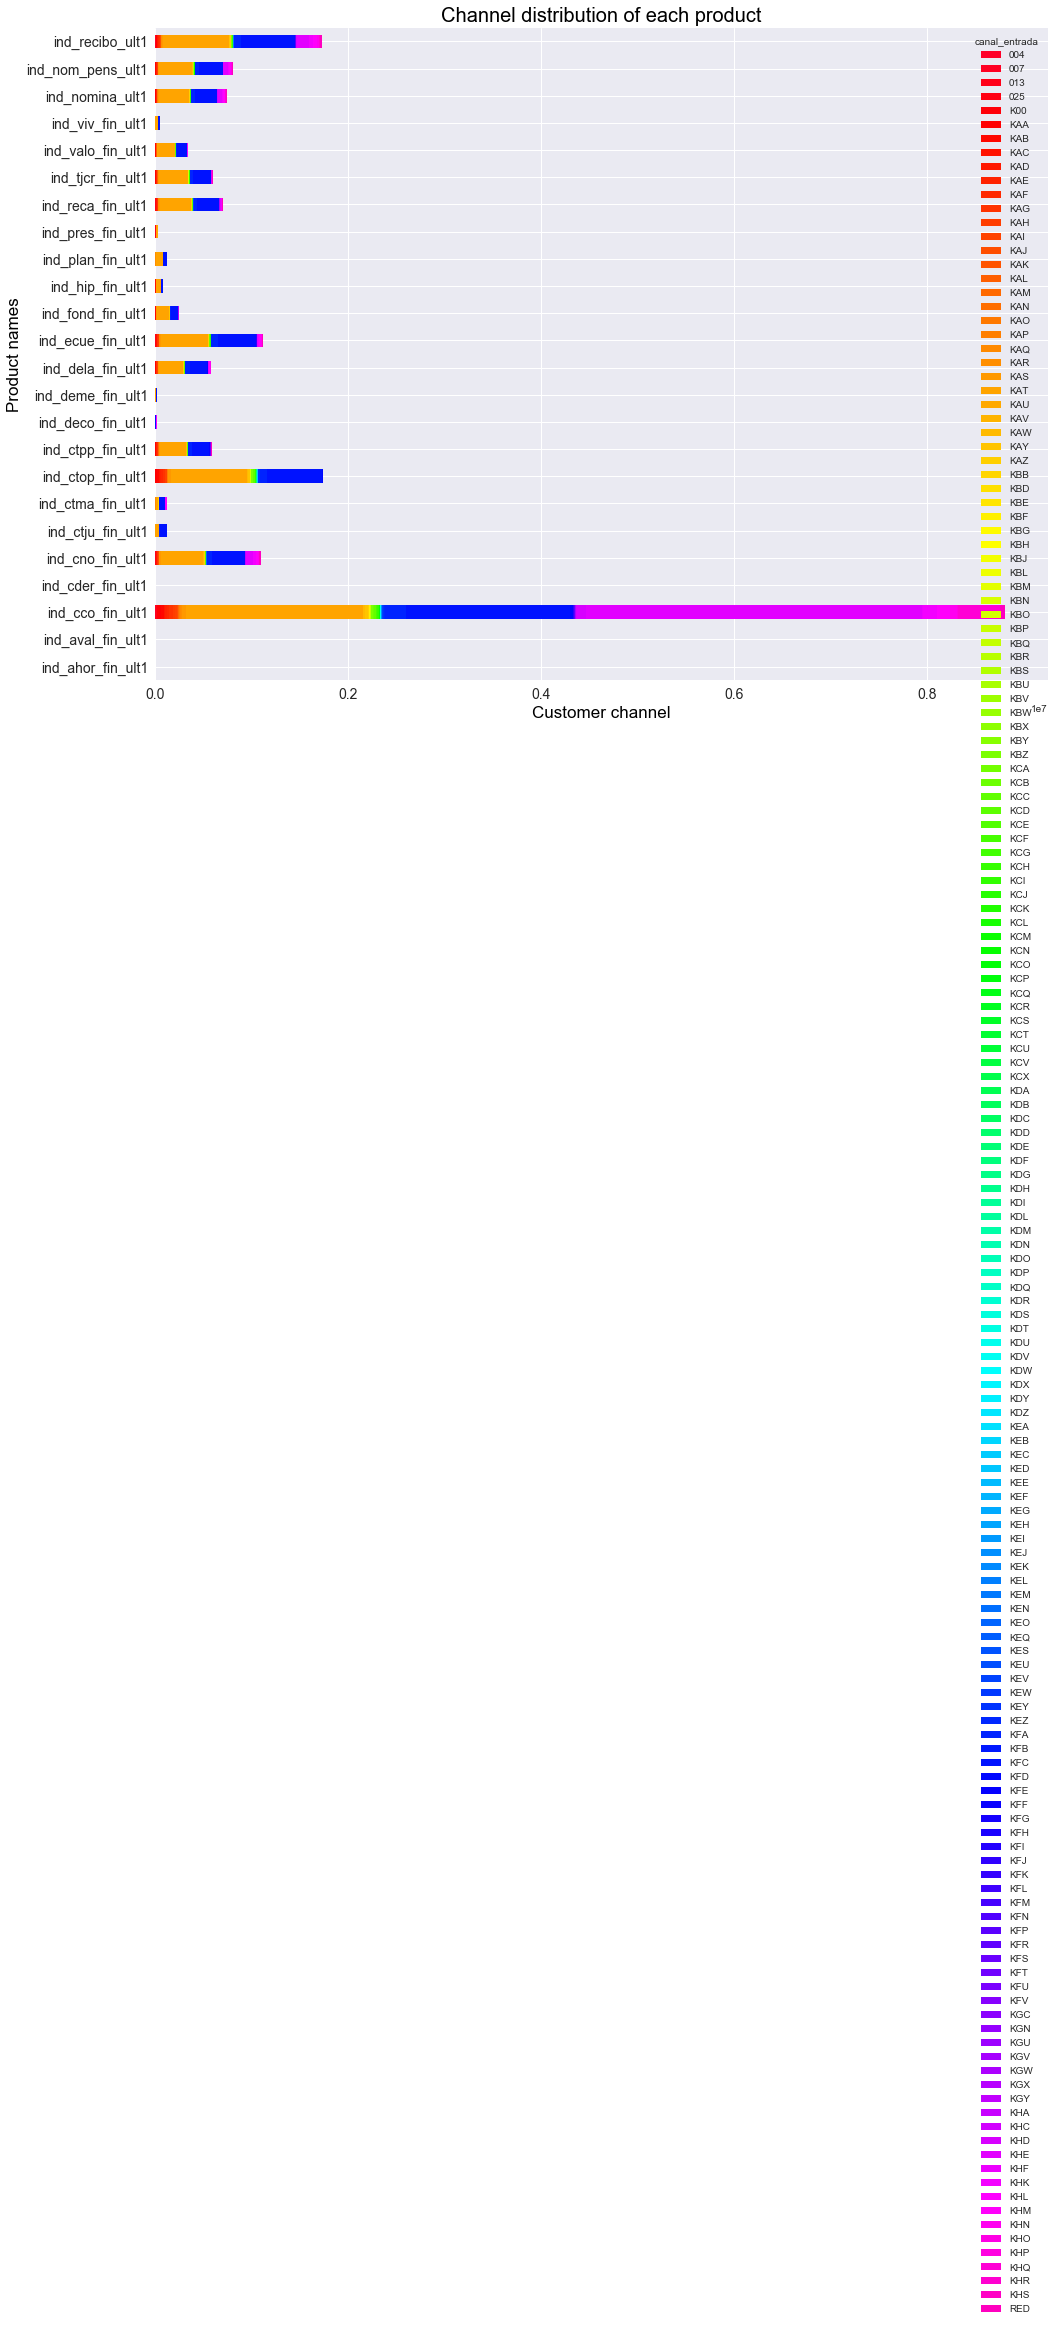

In [62]:
df_a = train.loc[:, ['canal_entrada']].join(train.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_a = df_a.groupby(['canal_entrada']).sum()
df_a = df_a.T

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channel distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer channel', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black')